In [1]:
!pip install tmdbsimple


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os, time,json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook

FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['title.ratings.tsv',
 'title.akas.tsv.gz',
 '.DS_Store',
 'basics.csv.gz',
 'tmdb_api_results_2000.json',
 'title.basics.tsv.gz',
 'ratings.csv.gz',
 'title.ratings.tsv.gz',
 'akas.csv.gz',
 '.ipynb_checkpoints']

In [3]:
!pip install tmdbsimple

In [4]:
import json
with open('/Users/abibrahim/.secret/tmdb_api.json/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [5]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [6]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [7]:
movie = tmdb.Movies(100)

In [8]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/cXQH2u7wUIX1eoIdEj51kHXoWhX.jpg',
 'belongs_to_collection': None,
 'budget': 1350000,
 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}],
 'homepage': 'http://www.universalstudiosentertainment.com/lock-stock-and-two-smoking-barrels/',
 'id': 100,
 'imdb_id': 'tt0120735',
 'original_language': 'en',
 'original_title': 'Lock, Stock and Two Smoking Barrels',
 'overview': 'A card shark and his unwillingly-enlisted friends need to make a lot of cash quick after losing a sketchy poker match. To do this they decide to pull a heist on a small-time gang who happen to be operating out of the flat next door.',
 'popularity': 11.8,
 'poster_path': '/8kSerJrhrJWKLk1LViesGcnrUPE.jpg',
 'production_companies': [{'id': 491,
   'logo_path': '/rUp0lLKa1pr4UsPm8fgzmnNGxtq.png',
   'name': 'Summit Entertainment',
   'origin_country': 'US'},
  {'id': 1382,
   'logo_path': '/sOg7LGESPH5vCTOIdbMhLuypoLL.png',
   'name': 'PolyGram Filmed Entertainment',

In [9]:
releases = movie.releases()
for i in releases['countries']:
    if i['iso_3166_1'] == 'US':
        print(i['certification'])

R


In [10]:
def get_movie_with_rating_id(movie_id):
    """Adapted from source = https://github.com/celio/tmdbsimple"""
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [11]:
test = get_movie_with_rating_id("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 221.907,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [12]:
test = get_movie_with_rating_id("tt0332280") #put your function name here
test


{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 62.882,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [13]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['title.ratings.tsv',
 'title.akas.tsv.gz',
 '.DS_Store',
 'basics.csv.gz',
 'tmdb_api_results_2000.json',
 'title.basics.tsv.gz',
 'ratings.csv.gz',
 'title.ratings.tsv.gz',
 'akas.csv.gz',
 '.ipynb_checkpoints']

In [14]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [15]:
basics = pd.read_csv('Data/basics.csv.gz')


In [16]:
YEARS_TO_GET = [2000,2001]



In [17]:
errors = [ ]


In [36]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0): 
    #Defining the JSON file to store results for year
    JSON_FILE = f'Data/tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
                json.dump([{'imdb_id':0}],f)
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

 #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating_id(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            errors.append([movie_id, e])
    
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/205 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/239 [00:00<?, ?it/s]

In [37]:
final_df = pd.read_json(JSON_FILE)
final_df.head(10)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,None,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.324,1152.0,PG-13
2,tt0114447,0.0,None,None,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,None,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,118.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,None,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.100,28.0,R
5,tt0119004,0.0,/7xrlSPGDO4CDT6IHTctDlkYxTzw.jpg,None,0.0,"[{'id': 18, 'name': 'Drama'}]",,37857.0,en,Don's Plum,...,6297.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Don's Plum,0.0,5.400,63.0,NaN
6,tt0120166,0.0,/havCE85OV7FUMWzqAZ9x31XRRCA.jpg,None,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",,50944.0,en,The Sorcerer's Apprentice,...,0.0,86.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,The Sorcerer's Apprentice,0.0,4.800,10.0,NR
7,tt0120624,0.0,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,50230.0,pt,Camarate,...,0.0,100.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,,Camarate,0.0,7.300,6.0,NaN
8,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,None,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.695,2392.0,R
9,tt0120737,0.0,/tqj7NKj11keFuLzPsBDMUq2dOUO.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.389,21741.0,PG-13


# Once you have your data from the API, they would like you to perform some light EDA to show:
* How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
* Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
* How many movies are there in each of the certification categories (G/PG/PG-13/R)?
* What is the average revenue per certification category?
* What is the average budget per certification category?

In [67]:
year_2000_df = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
year_2001_df = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')


In [69]:
years_2000_2002 = pd.concat((year_2000_df, year_2001_df))

In [70]:
years_2000_2002 

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.00,0.0,NaN
1288,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.00,0.0,NaN
1289,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.00,0.0,NaN
1290,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.00,0.0,NR


In [71]:
years_2000_2002.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,2497.000000,2.497000e+03,2.497000e+03,2497.000000,2.497000e+03,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.002002,5.325224e+06,1.722791e+05,5.724230,1.122036e+07,92.424109,0.001602,4.566015,264.828995
std,0.044712,1.722119e+07,2.082062e+05,14.310333,5.309183e+07,30.237534,0.040000,2.479261,1255.785249
min,0.000000,0.000000e+00,1.600000e+01,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,2.660200e+04,0.894000,0.000000e+00,87.000000,0.000000,3.300000,1.000000
50%,0.000000,0.000000e+00,7.802700e+04,2.164000,0.000000e+00,94.000000,0.000000,5.300000,7.000000
75%,0.000000,0.000000e+00,2.689510e+05,5.613000,0.000000e+00,104.000000,0.000000,6.300000,42.000000
max,1.000000,1.400000e+08,1.030475e+06,299.238000,9.764756e+08,345.000000,1.000000,10.000000,23474.000000


In [72]:
years_2000_2002


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.00,0.0,NaN
1288,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.00,0.0,NaN
1289,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.00,0.0,NaN
1290,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.00,0.0,NR


In [73]:
# Print out the number of nulls within each column 
print(years_2000_2002.isnull().sum())

imdb_id                     0
adult                       2
backdrop_path            1187
belongs_to_collection    2304
budget                      2
genres                      2
homepage                 2324
id                          2
original_language           2
original_title              2
overview                   52
popularity                  2
poster_path               284
production_companies        2
production_countries        2
release_date               18
revenue                     2
runtime                     2
spoken_languages            2
status                      2
tagline                  1450
title                       2
video                       2
vote_average                2
vote_count                  2
certification            1701
dtype: int64


In [76]:
years_2000_2002 = years_2000_2002.dropna(subset=['certification', 'revenue', 'budget' ])


In [77]:
years_2000_2002.isna().sum()

imdb_id                    0
adult                      0
backdrop_path            196
belongs_to_collection    693
budget                     0
genres                     0
homepage                 704
id                         0
original_language          0
original_title             0
overview                   1
popularity                 0
poster_path               35
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  197
title                      0
video                      0
vote_average               0
vote_count                 0
certification              0
dtype: int64

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


In [80]:
movieswithbudget = (years_2000_2002['budget'] > 0) | (years_2000_2002['revenue'] > 0)

In [81]:
movieswithbudget.value_counts()

True     425
False    373
dtype: int64

**There were 425 movies with a budget**

# How many movies are there in each of the certification categories (G/PG/PG-13/R)?


In [82]:
years_2000_2002['certification'].value_counts()

R          453
PG-13      181
NR          68
PG          64
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [ ]:
years_2000_2002.head()

In [ ]:
years_2000_2002.info()

3. What is the average revenue per certification category?

<AxesSubplot:xlabel='certification', ylabel='revenue'>

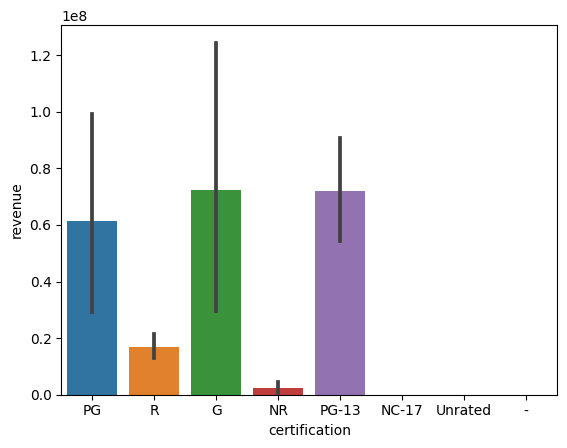

In [83]:
sns.barplot(data=years_2000_2002, x='certification', y ='revenue')

4. What is the average budget per certification category?


<AxesSubplot:xlabel='certification', ylabel='budget'>

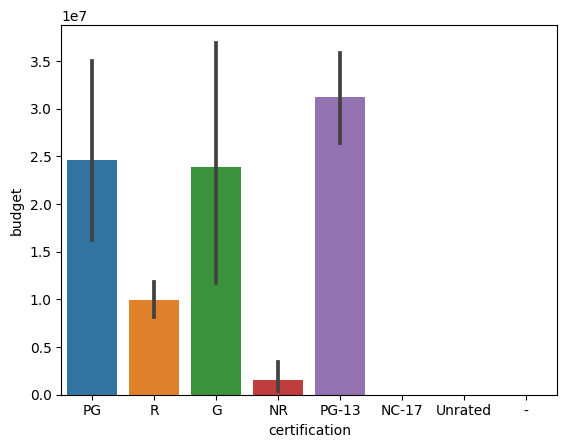

In [84]:
sns.barplot(data=years_2000_2002, x='certification', y ='budget')

In [89]:
years_2000_2002.to_csv('Data/combined_tmdb_dataframe.csv', index=False)

In [90]:
df = pd.read_csv('Data/combined_tmdb_dataframe.csv')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                798 non-null    object 
 1   adult                  798 non-null    float64
 2   backdrop_path          602 non-null    object 
 3   belongs_to_collection  105 non-null    object 
 4   budget                 798 non-null    float64
 5   genres                 798 non-null    object 
 6   homepage               94 non-null     object 
 7   id                     798 non-null    float64
 8   original_language      798 non-null    object 
 9   original_title         798 non-null    object 
 10  overview               797 non-null    object 
 11  popularity             798 non-null    float64
 12  poster_path            763 non-null    object 
 13  production_companies   798 non-null    object 
 14  production_countries   798 non-null    object 
 15  releas